In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [98]:
house_info = pd.read_csv('/Users/rakshitrane/Downloads/USA_Housing.csv')
house_info.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [99]:
house_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [100]:
house_info.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


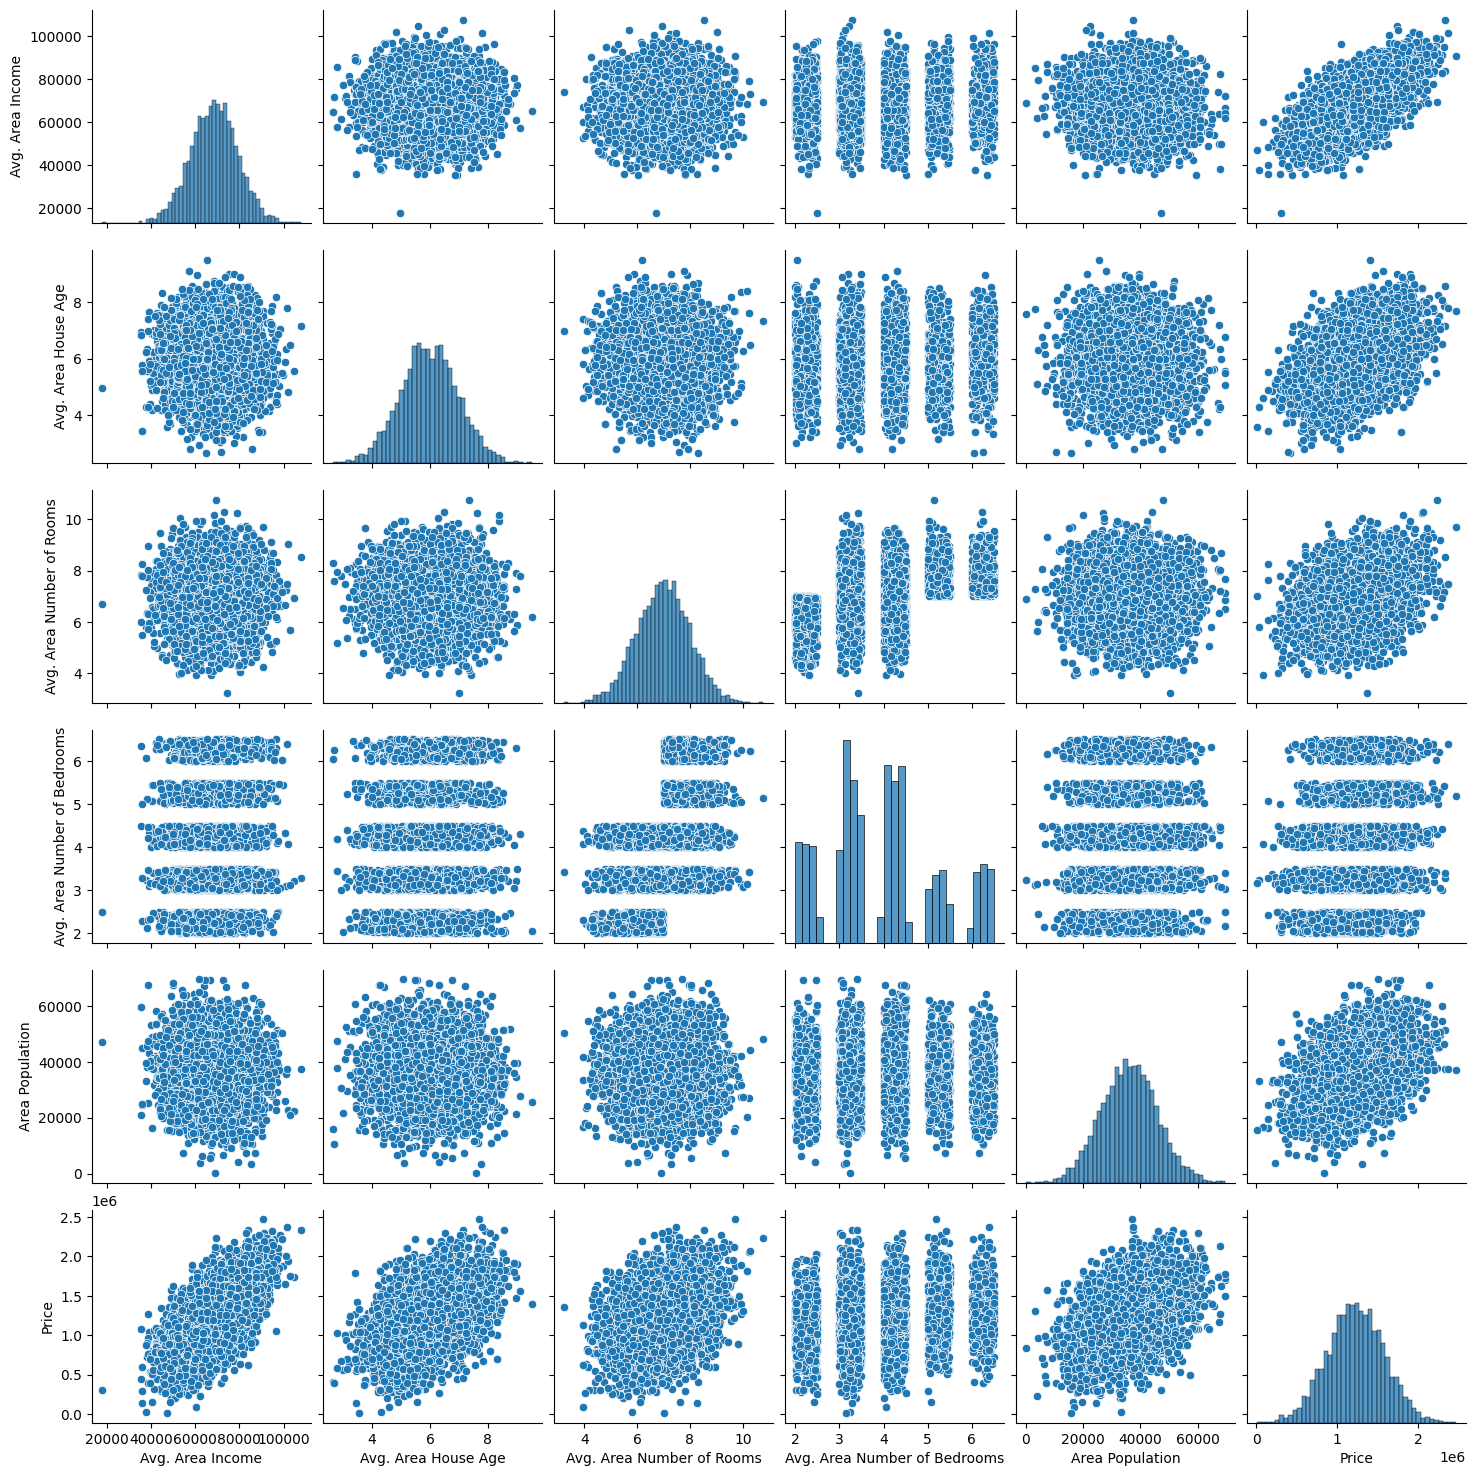

In [102]:
sns.pairplot(house_info)

In [103]:
# Select only the numeric columns from the Data
numeric_df = house_info.select_dtypes(include=[np.number])

<Axes: >

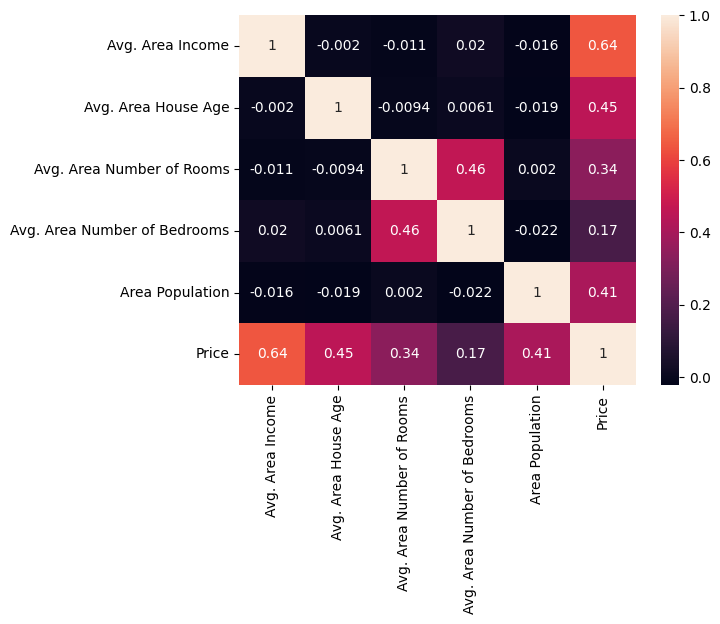

In [104]:
# Now you can compute the correlation matrix and plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

In [105]:
# Fill missing values only for columns having a numerical value
numeric_cols = house_info.select_dtypes(include=[np.number]).columns
house_info[numeric_cols] = house_info[numeric_cols].fillna(house_info[numeric_cols].median())

# Creating new feature like price per square foot from exisiting data
house_info['Price_per_sqft'] = house_info['Price'] / house_info['Area Population']

# Creating more terms by merging
house_info['Avg Area Income * Avg Area Number of Rooms'] = house_info['Avg. Area Income'] * house_info['Avg. Area Number of Rooms']

In [106]:
# Decided how the price of the house is going to be predicted

X = house_info[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = house_info['Price']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [109]:
# Feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
# Trained model on basis of linear regression and fitted with training dataset of X and y

a = LinearRegression()
a.fit(X_train,y_train)

LinearRegression()

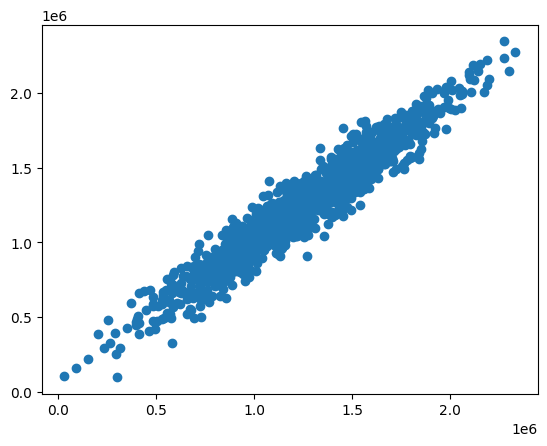

In [114]:
# Plotted the predictions acquired from the model we built above by linear regression

predictions = a.predict(X_test)
plt.scatter(y_test,predictions)

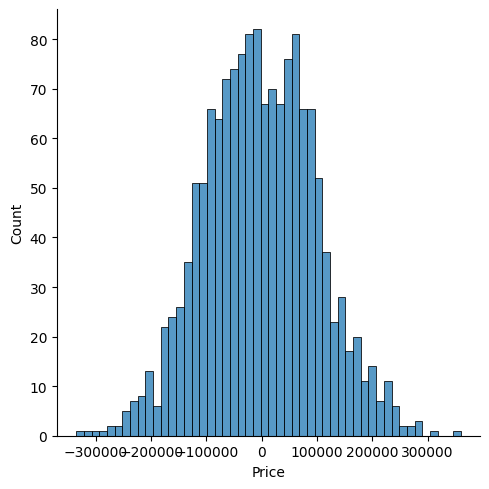

In [115]:
# Checks the difference between predicted and true value, showing how the error distribution
sns.displot((y_test-predictions),bins=50)

In [117]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error : 81257.55795855969
Mean Squared Error : 10169125565.89762
Root Mean Squared Error: 100842.08231635054


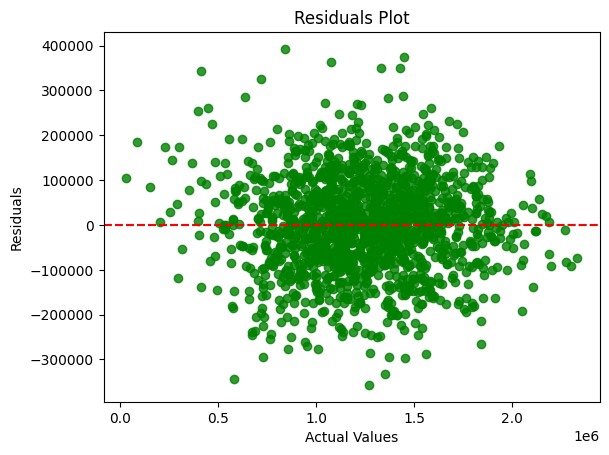

In [122]:
# Residual plot without lowess
sns.residplot(x=y_test, y=y_pred, color='g')
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')  # Horizontal line at zero, shows how much the predicted values are off from the true values or 0
plt.show()

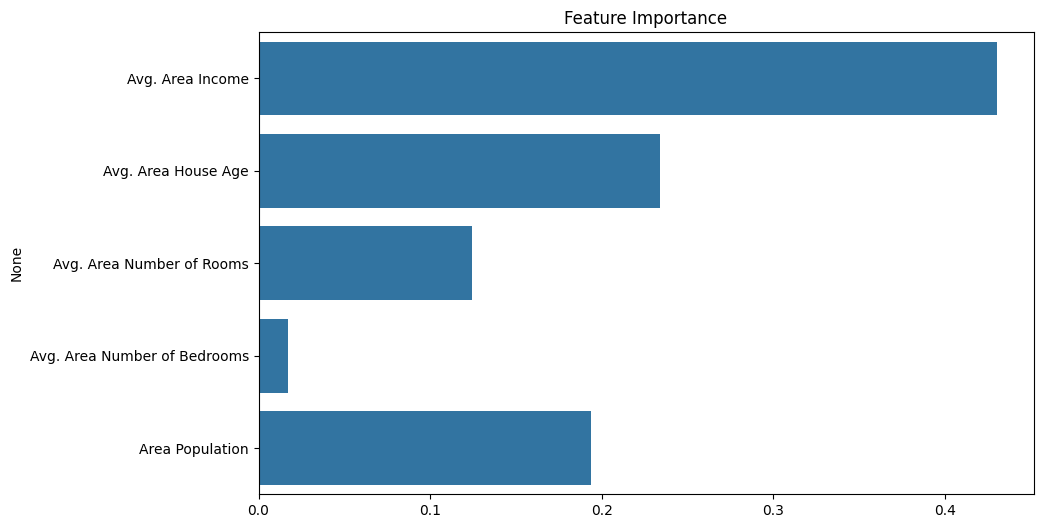

In [124]:
# Feature Importance Visualization, shows which features' importance is the most while predicting house prices
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

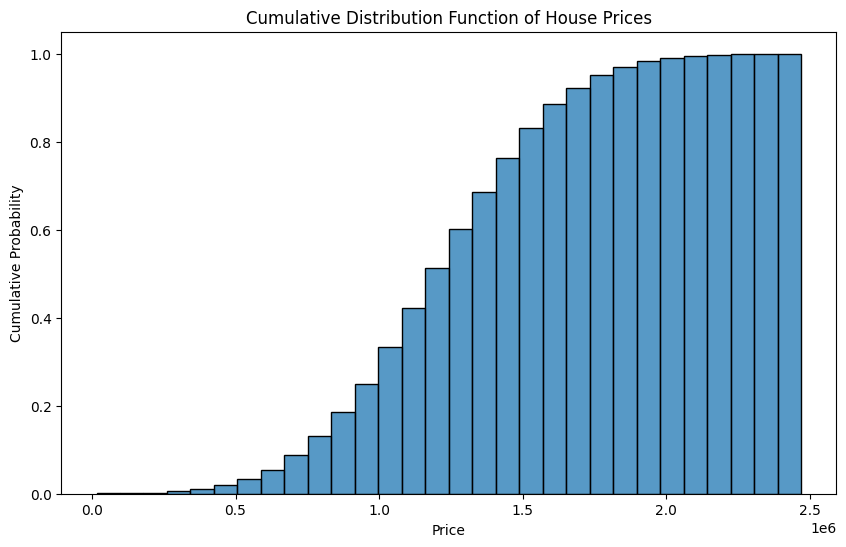

In [125]:
# Shows us the probability that a house will be less than or equal to that price
plt.figure(figsize=(10, 6))
sns.histplot(house_info['Price'], cumulative=True, stat='density', bins=30)
plt.title('Cumulative Distribution Function of House Prices')
plt.xlabel('Price')
plt.ylabel('Cumulative Probability')
plt.show()


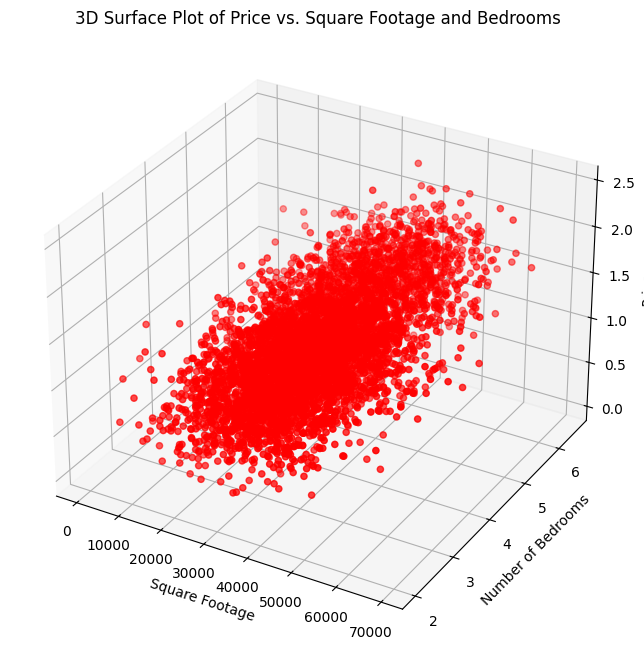

In [127]:
# Seeing a 3-D plot between price, floor area and bedrooms, all three at once

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = house_info['Area Population']
y = house_info['Avg. Area Number of Bedrooms']
z = house_info['Price']

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Square Footage')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')
ax.set_title('3D Surface Plot of Price vs. Square Footage and Bedrooms')
plt.show()


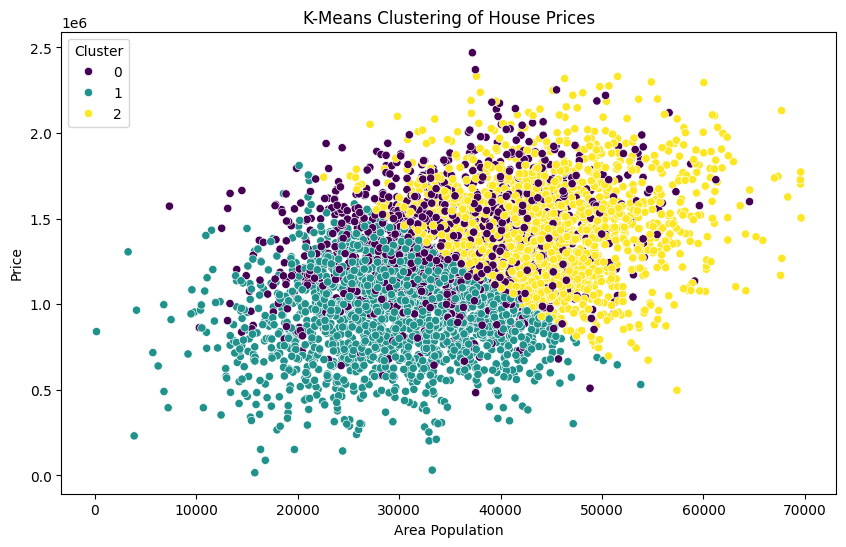

In [129]:
# Houses are grouped into three clusters based on their population area, number of bedrooms, and price.
# Each cluster is color-coded to show how the houses are segmented.

features = house_info[['Area Population', 'Avg. Area Number of Bedrooms', 'Price']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)
house_info['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area Population', y='Price', hue='Cluster', data=house_info, palette='viridis')
plt.title('K-Means Clustering of House Prices')
plt.show()
